In [7]:
import torch

In [11]:
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

In [12]:
N,D_in,H,D_out=64,1000,100,10

In [17]:
x=Variable(torch.randn(N,D_in))
y=Variable(torch.randn(N,D_out), requires_grad=False)

In [28]:
model=torch.nn.Sequential(
torch.nn.Linear(D_in,H),
torch.nn.ReLU(),
torch.nn.Linear(H,D_out))

In [29]:
loss_fn=torch.nn.MSELoss(size_average=False)

In [30]:
loss_dict=[]
learning_rate=1e-4
for t in range(500):
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    loss_dict.append(loss)
    model.zero_grad()
    loss.backward()
    for param in model.parameters():
        param.data-=learning_rate*param.grad.data

<function matplotlib.pyplot.show>

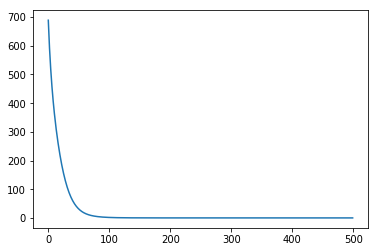

In [32]:
from matplotlib import pyplot as plt
plt.plot(loss_dict)
plt.show